In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import export_text
from sklearn.metrics import confusion_matrix
import os
import joblib

from sklearn.tree import plot_tree



In [4]:
# def location_to_soil(location,soil=False):

#     if(soil!=False):
#         return soil
#     soils_in_india = {
#     "Alluvial Soil": ["Bihar", "Uttar Pradesh", "West Bengal", "Delhi", "Haryana", "Punjab", "Himachal Pradesh", "Jammu and Kashmir"],
#     "Red Soil": ["Andhra Pradesh", "Karnataka", "Kerala", "Tamil Nadu", "Odisha", "Jharkhand"],
#     "Black Soil": ["Maharashtra", "Gujarat", "Madhya Pradesh", "Chhattisgarh"],
#     "Mountain Soil": ["Himachal Pradesh", "Jammu and Kashmir", "Uttarakhand", "Sikkim"],
#     "Desert Soil": ["Rajasthan"],
#     "Saline and Alkaline Soil": ["Gujarat", "Rajasthan", "Haryana"],
#     "Laterite Soil": ["Kerala", "Karnataka", "Goa", "Tamil Nadu"],
#     "Peaty Soil": ["Assam", "West Bengal", "Odisha", "Meghalaya"]
#     }
#     soils = []
#     for key,item in enumerate(soils_in_india):
#         for i in soils_in_india[item]:
#             if(i == location):
#                 soils.append(item)
#     print(soils)
#     return soils




In [26]:
#to predict the crop

def predict_crop(path,data):
        df = pd.read_csv(path)
        features = df[['N', 'P','K','temperature', 'ph', 'rainfall']]
        target = df['label']
        labels = df['label']
        Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)
        Xtrain = np.array(Xtrain)
        Xtest = np.array(Xtest)
        RF = RandomForestClassifier(n_estimators=20, random_state=0)
        RF.fit(Xtrain,Ytrain)
        predicted_values = RF.predict(Xtest)
        x = metrics.accuracy_score(Ytest, predicted_values)
        #confusion matrix
        cm = confusion_matrix(Ytest, predicted_values)
        sns.heatmap(cm,annot=True,fmt="d")
        plt.show()

        print("Accuracy is",x)
        # data = np.array([[104,18, 30, 23.603016, 60.3, 6.7, 140.91]])
        prediction = RF.predict(data)
        #save the model
        print(prediction)
        
        print("Tree in text format:")
        print(export_text(RF.estimators_[0], 
                        spacing=3, decimals=3,
                        feature_names=features.columns.tolist()))
        joblib.dump(RF, "my_randoms_forest.joblib")
    

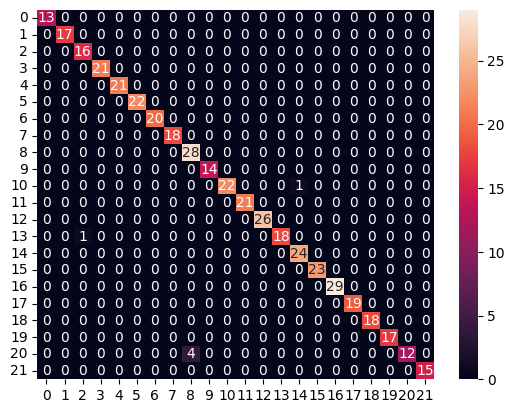

Accuracy is 0.9863636363636363
['coffee']
Tree in text format:
|--- K <= 65.000
|   |--- rainfall <= 30.657
|   |   |--- class: 15.0
|   |--- rainfall >  30.657
|   |   |--- K <= 35.500
|   |   |   |--- K <= 25.500
|   |   |   |   |--- P <= 32.000
|   |   |   |   |   |--- N <= 60.000
|   |   |   |   |   |   |--- rainfall <= 100.079
|   |   |   |   |   |   |   |--- class: 12.0
|   |   |   |   |   |   |--- rainfall >  100.079
|   |   |   |   |   |   |   |--- rainfall <= 142.306
|   |   |   |   |   |   |   |   |--- class: 16.0
|   |   |   |   |   |   |   |--- rainfall >  142.306
|   |   |   |   |   |   |   |   |--- class: 4.0
|   |   |   |   |   |--- N >  60.000
|   |   |   |   |   |   |--- class: 5.0
|   |   |   |   |--- P >  32.000
|   |   |   |   |   |--- P <= 60.500
|   |   |   |   |   |   |--- temperature <= 26.254
|   |   |   |   |   |   |   |--- temperature <= 22.350
|   |   |   |   |   |   |   |   |--- temperature <= 17.877
|   |   |   |   |   |   |   |   |   |--- class: 9.0
|   |

In [27]:
data = np.array([[104,18, 30, 23.603016, 6.7, 140.91]])
predict_crop("Crop_recommendation.csv",data)

<AxesSubplot: >

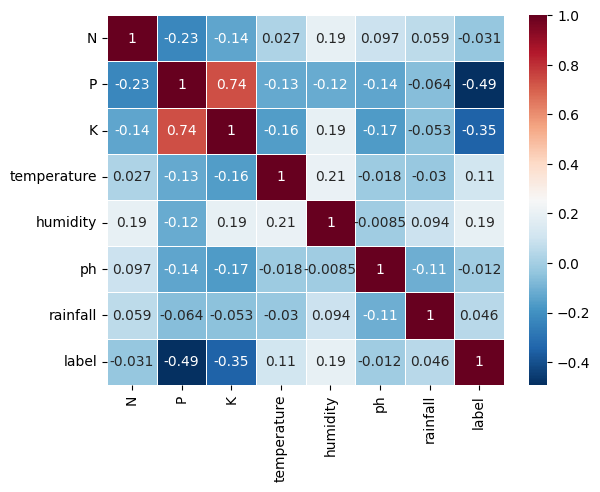

In [16]:
df = pd.read_csv("Crop_recommendation.csv")
#convert the label column to integer
df['label'] = df['label'].astype('category')
df['label'] = df['label'].cat.codes

#make a correlation matrix
corr = df.corr()
#plot the heatmap
sns.heatmap(corr,
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        cmap='RdBu_r',
        annot=True,
        linewidth=0.5)
        
        